In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

/Users/arpariseau/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
Couldn't import dot_parser, loading of dot files will not be possible.


In [3]:
eravate = pd.read_csv('./eravate.csv')
epsilon_indi = pd.read_csv('./epsilon_indi.csv')
calennero = pd.read_csv('./calennero.csv')
wolf_906 = pd.read_csv('./wolf_906.csv')

In [4]:
def set_lookback(data, lookback=1):
    a = data[0:len(data) - lookback - 1]
    b = data[lookback:len(data) - 1]
    return a, b

In [5]:
np.random.seed(330)

In [122]:
#data = eravate['margin'].values
#data = epsilon_indi['margin'].values
data = calennero['margin'].values
#data = wolf_906['margin'].values

In [123]:
data

array([1604, 1732, 1872, 1872, 1872, 1744, 1739, 1602, 1601, 1729, 1916,
       1916, 1788, 1744, 1739, 1723, 1723, 1723, 1723, 1744, 1744, 1744,
       1739, 1692, 1692, 1692, 1692, 1744, 1744, 1744, 1773])

In [124]:
#ss = StandardScaler()
mm = MinMaxScaler(feature_range=(-1,1))
#d_sc = ss.fit_transform(data.reshape(-1, 1))
d_mm = mm.fit_transform(data.reshape(-1, 1))

/Users/arpariseau/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [125]:
#train = d_sc[0:24]
train = d_mm[0:24]
len(train)

24

In [126]:
#test = d_sc[24:31]
test = d_mm[24:31]
len(test)

7

In [127]:
x_train, y_train = set_lookback(train)

In [128]:
x_test, y_test = set_lookback(test)

In [129]:
x_train_rs = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test_rs = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [130]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))

In [131]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [132]:
model.fit(x_train_rs, y_train, validation_data=(x_test_rs, y_test), epochs=500)

Train on 22 samples, validate on 5 samples
Epoch 1/500
22/22 [==============================] - 1s 50ms/step - loss: 0.2468 - val_loss: 0.0604
Epoch 2/500
22/22 [==============================] - 0s 155us/step - loss: 0.2464 - val_loss: 0.0605
Epoch 3/500
22/22 [==============================] - 0s 184us/step - loss: 0.2461 - val_loss: 0.0606
Epoch 4/500
22/22 [==============================] - 0s 246us/step - loss: 0.2458 - val_loss: 0.0607
Epoch 5/500
22/22 [==============================] - 0s 228us/step - loss: 0.2455 - val_loss: 0.0608
Epoch 6/500
22/22 [==============================] - 0s 188us/step - loss: 0.2451 - val_loss: 0.0608
Epoch 7/500
22/22 [==============================] - 0s 292us/step - loss: 0.2448 - val_loss: 0.0609
Epoch 8/500
22/22 [==============================] - 0s 194us/step - loss: 0.2445 - val_loss: 0.0610
Epoch 9/500
22/22 [==============================] - 0s 177us/step - loss: 0.2442 - val_loss: 0.0611
Epoch 10/500
22/22 [=============================

Epoch 81/500
22/22 [==============================] - 0s 176us/step - loss: 0.2246 - val_loss: 0.0558
Epoch 82/500
22/22 [==============================] - 0s 209us/step - loss: 0.2244 - val_loss: 0.0556
Epoch 83/500
22/22 [==============================] - 0s 222us/step - loss: 0.2241 - val_loss: 0.0555
Epoch 84/500
22/22 [==============================] - 0s 209us/step - loss: 0.2239 - val_loss: 0.0554
Epoch 85/500
22/22 [==============================] - 0s 187us/step - loss: 0.2236 - val_loss: 0.0553
Epoch 86/500
22/22 [==============================] - 0s 169us/step - loss: 0.2234 - val_loss: 0.0552
Epoch 87/500
22/22 [==============================] - 0s 149us/step - loss: 0.2232 - val_loss: 0.0551
Epoch 88/500
22/22 [==============================] - 0s 226us/step - loss: 0.2229 - val_loss: 0.0549
Epoch 89/500
22/22 [==============================] - 0s 172us/step - loss: 0.2227 - val_loss: 0.0548
Epoch 90/500
22/22 [==============================] - 0s 188us/step - loss: 0.2225

Epoch 161/500
22/22 [==============================] - 0s 194us/step - loss: 0.2070 - val_loss: 0.0455
Epoch 162/500
22/22 [==============================] - 0s 178us/step - loss: 0.2068 - val_loss: 0.0454
Epoch 163/500
22/22 [==============================] - 0s 195us/step - loss: 0.2066 - val_loss: 0.0452
Epoch 164/500
22/22 [==============================] - 0s 189us/step - loss: 0.2064 - val_loss: 0.0451
Epoch 165/500
22/22 [==============================] - 0s 189us/step - loss: 0.2062 - val_loss: 0.0450
Epoch 166/500
22/22 [==============================] - 0s 157us/step - loss: 0.2060 - val_loss: 0.0448
Epoch 167/500
22/22 [==============================] - 0s 191us/step - loss: 0.2058 - val_loss: 0.0447
Epoch 168/500
22/22 [==============================] - 0s 167us/step - loss: 0.2056 - val_loss: 0.0445
Epoch 169/500
22/22 [==============================] - 0s 180us/step - loss: 0.2054 - val_loss: 0.0444
Epoch 170/500
22/22 [==============================] - 0s 189us/step - lo

Epoch 241/500
22/22 [==============================] - 0s 141us/step - loss: 0.1940 - val_loss: 0.0350
Epoch 242/500
22/22 [==============================] - 0s 195us/step - loss: 0.1939 - val_loss: 0.0349
Epoch 243/500
22/22 [==============================] - 0s 163us/step - loss: 0.1938 - val_loss: 0.0347
Epoch 244/500
22/22 [==============================] - 0s 166us/step - loss: 0.1937 - val_loss: 0.0346
Epoch 245/500
22/22 [==============================] - 0s 200us/step - loss: 0.1935 - val_loss: 0.0345
Epoch 246/500
22/22 [==============================] - 0s 170us/step - loss: 0.1934 - val_loss: 0.0344
Epoch 247/500
22/22 [==============================] - 0s 197us/step - loss: 0.1933 - val_loss: 0.0343
Epoch 248/500
22/22 [==============================] - 0s 201us/step - loss: 0.1932 - val_loss: 0.0342
Epoch 249/500
22/22 [==============================] - 0s 167us/step - loss: 0.1931 - val_loss: 0.0340
Epoch 250/500
22/22 [==============================] - 0s 170us/step - lo

Epoch 321/500
22/22 [==============================] - 0s 134us/step - loss: 0.1875 - val_loss: 0.0274
Epoch 322/500
22/22 [==============================] - 0s 186us/step - loss: 0.1875 - val_loss: 0.0273
Epoch 323/500
22/22 [==============================] - 0s 213us/step - loss: 0.1874 - val_loss: 0.0272
Epoch 324/500
22/22 [==============================] - 0s 179us/step - loss: 0.1874 - val_loss: 0.0272
Epoch 325/500
22/22 [==============================] - 0s 189us/step - loss: 0.1873 - val_loss: 0.0271
Epoch 326/500
22/22 [==============================] - 0s 199us/step - loss: 0.1873 - val_loss: 0.0270
Epoch 327/500
22/22 [==============================] - 0s 153us/step - loss: 0.1873 - val_loss: 0.0270
Epoch 328/500
22/22 [==============================] - 0s 152us/step - loss: 0.1872 - val_loss: 0.0269
Epoch 329/500
22/22 [==============================] - 0s 196us/step - loss: 0.1872 - val_loss: 0.0268
Epoch 330/500
22/22 [==============================] - 0s 182us/step - lo

Epoch 401/500
22/22 [==============================] - 0s 208us/step - loss: 0.1855 - val_loss: 0.0237
Epoch 402/500
22/22 [==============================] - 0s 196us/step - loss: 0.1855 - val_loss: 0.0237
Epoch 403/500
22/22 [==============================] - 0s 173us/step - loss: 0.1855 - val_loss: 0.0236
Epoch 404/500
22/22 [==============================] - 0s 160us/step - loss: 0.1855 - val_loss: 0.0236
Epoch 405/500
22/22 [==============================] - 0s 187us/step - loss: 0.1855 - val_loss: 0.0236
Epoch 406/500
22/22 [==============================] - 0s 183us/step - loss: 0.1855 - val_loss: 0.0236
Epoch 407/500
22/22 [==============================] - 0s 167us/step - loss: 0.1855 - val_loss: 0.0235
Epoch 408/500
22/22 [==============================] - 0s 182us/step - loss: 0.1855 - val_loss: 0.0235
Epoch 409/500
22/22 [==============================] - 0s 157us/step - loss: 0.1855 - val_loss: 0.0235
Epoch 410/500
22/22 [==============================] - 0s 215us/step - lo

Epoch 481/500
22/22 [==============================] - 0s 232us/step - loss: 0.1851 - val_loss: 0.0225
Epoch 482/500
22/22 [==============================] - 0s 199us/step - loss: 0.1851 - val_loss: 0.0225
Epoch 483/500
22/22 [==============================] - 0s 214us/step - loss: 0.1851 - val_loss: 0.0224
Epoch 484/500
22/22 [==============================] - 0s 197us/step - loss: 0.1850 - val_loss: 0.0224
Epoch 485/500
22/22 [==============================] - 0s 180us/step - loss: 0.1850 - val_loss: 0.0224
Epoch 486/500
22/22 [==============================] - 0s 248us/step - loss: 0.1850 - val_loss: 0.0224
Epoch 487/500
22/22 [==============================] - 0s 202us/step - loss: 0.1850 - val_loss: 0.0224
Epoch 488/500
22/22 [==============================] - 0s 186us/step - loss: 0.1850 - val_loss: 0.0224
Epoch 489/500
22/22 [==============================] - 0s 201us/step - loss: 0.1850 - val_loss: 0.0224
Epoch 490/500
22/22 [==============================] - 0s 226us/step - lo

In [133]:
train_predict = model.predict(x_train_rs)
test_predict = model.predict(x_test_rs)

In [134]:
#predict_tr = ss.inverse_transform(train_predict)
#compare_tr = ss.inverse_transform(y_train)
#predict_tt = ss.inverse_transform(test_predict)
#compare_tt = ss.inverse_transform(y_test)
predict_tr = mm.inverse_transform(train_predict)
compare_tr = mm.inverse_transform(y_train)
predict_tt = mm.inverse_transform(test_predict)
compare_tt = mm.inverse_transform(y_test)

In [135]:
train_score = np.sqrt(mean_squared_error(compare_tr, predict_tr[:,0]))
test_score = np.sqrt(mean_squared_error(compare_tt, predict_tt[:,0]))

In [136]:
train_score

67.74413835244383

In [137]:
test_score

23.540812064683205

In [138]:
predict = model.predict(np.reshape(d_mm, (d_mm.shape[0], 1, d_mm.shape[1])))

In [139]:
predictions = []
a = model.predict(np.reshape(predict[-8:-1], (7, 1, 1)))
predictions.append(a[0][0])
for r in range(0, 6):
    a = model.predict(np.reshape(a, (7, 1, 1)))
    predictions.append(a[0][0])

In [140]:
new_predict = np.array(predictions).reshape(7, 1)

In [141]:
fin_predict = mm.inverse_transform(new_predict)

In [142]:
predict_plot_tr = np.empty_like(d_mm)
predict_plot_tr[:, :] = np.nan
predict_plot_tr[1:len(predict_tr) + 1, :] = predict_tr

In [143]:
predict_plot_tt = np.empty_like(d_mm)
predict_plot_tt[:, :] = np.nan
predict_plot_tt[len(predict_tr)+3:len(data)-1, :] = predict_tt

In [144]:
weekplus_pred = []
for p in mm.inverse_transform(predict):
    weekplus_pred.append(p[0])
for p in fin_predict:
    weekplus_pred.append(p[0])

Text(0.5,1,'Eravate')

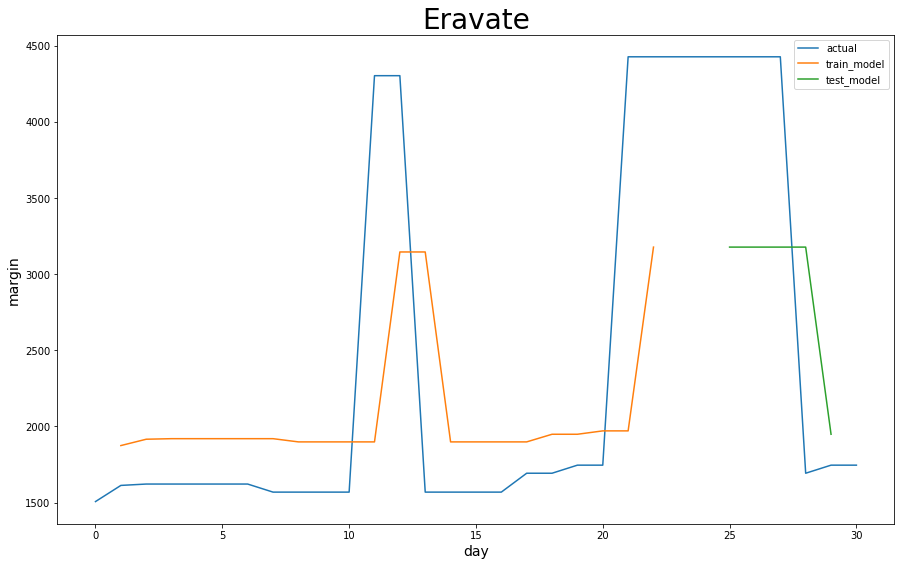

In [91]:
plt.figure(figsize=(15,9))
plt.plot(data, label="actual")
plt.plot(predict_plot_tr, label="train_model")
plt.plot(predict_plot_tt, label="test_model")
plt.xlabel("day", fontsize=14)
plt.ylabel("margin", fontsize=14)
plt.legend()
plt.title("Eravate", fontsize=28)

Text(0.5,1,'Eravate')

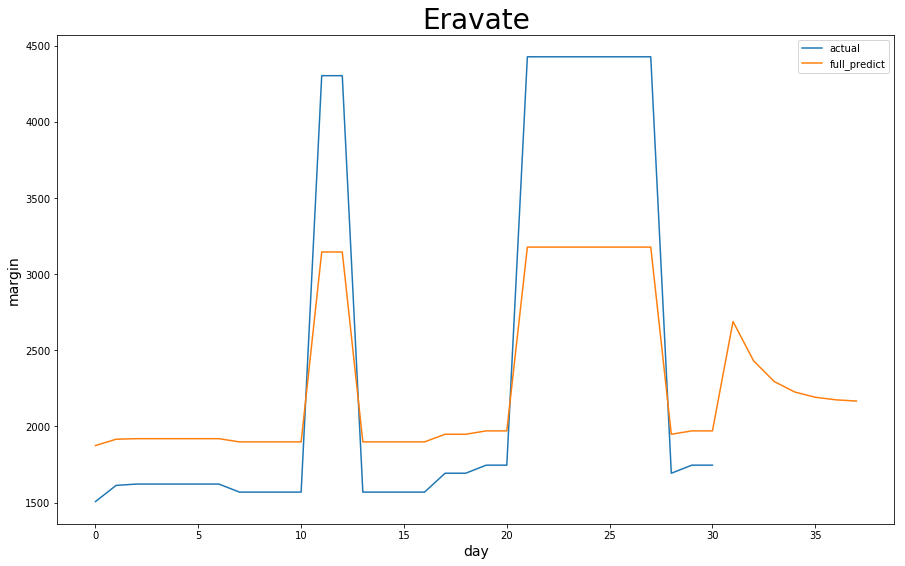

In [92]:
plt.figure(figsize=(15,9))
plt.plot(data, label="actual")
plt.plot(weekplus_pred, label ="full_predict")
plt.xlabel("day", fontsize=14)
plt.ylabel("margin", fontsize=14)
plt.legend()
plt.title("Eravate", fontsize=28)

Text(0.5,1,'Epsilon Indi')

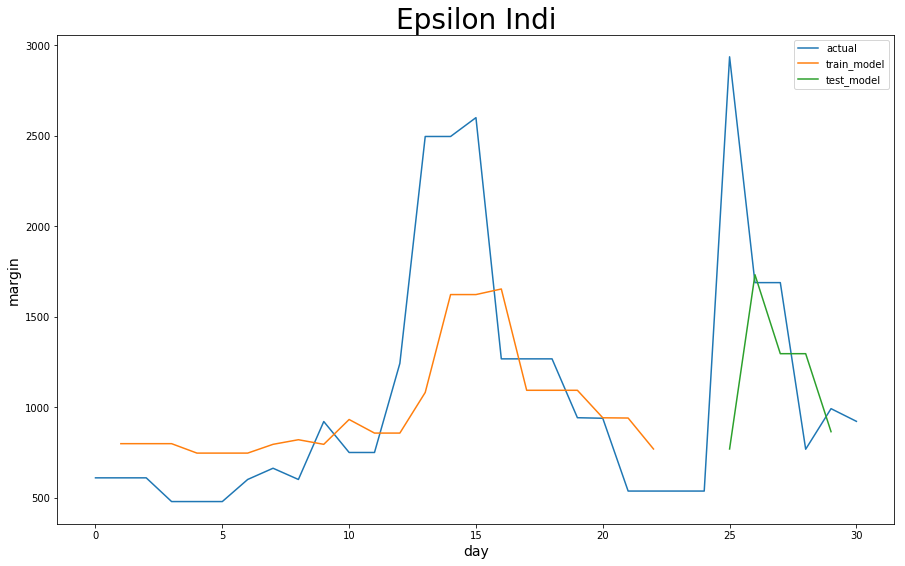

In [118]:
plt.figure(figsize=(15,9))
plt.plot(data, label="actual")
plt.plot(predict_plot_tr, label="train_model")
plt.plot(predict_plot_tt, label="test_model")
plt.xlabel("day", fontsize=14)
plt.ylabel("margin", fontsize=14)
plt.legend()
plt.title("Epsilon Indi", fontsize=28)

Text(0.5,1,'Epsilon Indi')

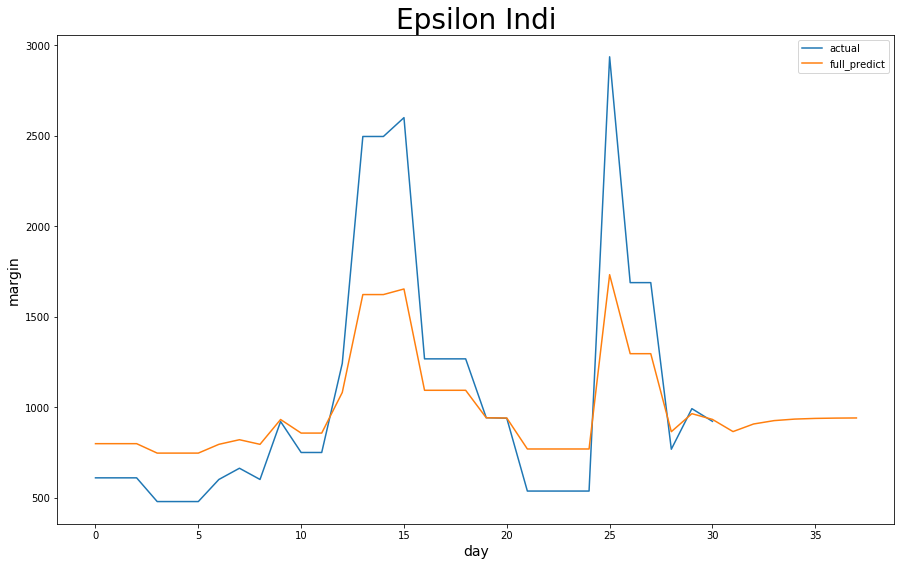

In [120]:
plt.figure(figsize=(15,9))
plt.plot(data, label="actual")
plt.plot(weekplus_pred, label ="full_predict")
plt.xlabel("day", fontsize=14)
plt.ylabel("margin", fontsize=14)
plt.legend()
plt.title("Epsilon Indi", fontsize=28)

Text(0.5,1,'Calennero')

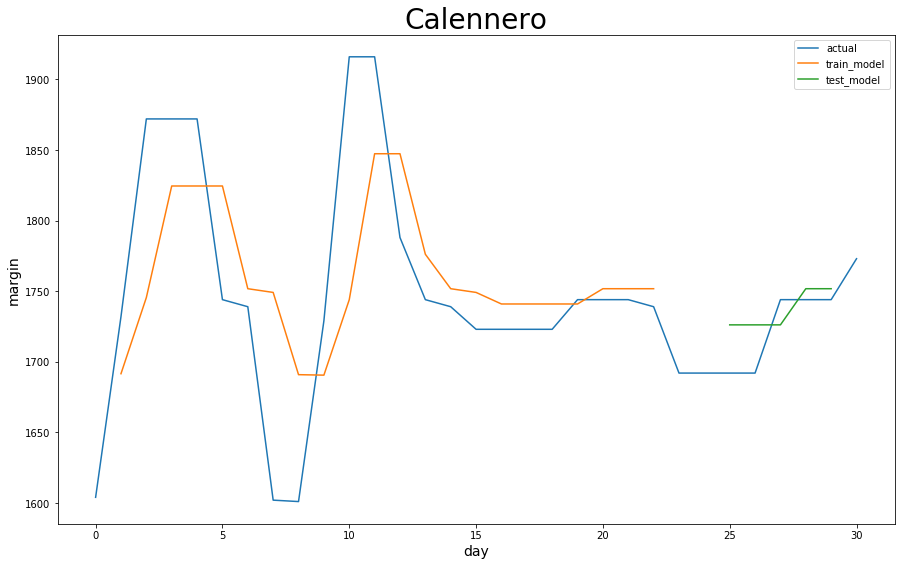

In [151]:
plt.figure(figsize=(15,9))
plt.plot(data, label="actual")
plt.plot(predict_plot_tr, label="train_model")
plt.plot(predict_plot_tt, label="test_model")
plt.xlabel("day", fontsize=14)
plt.ylabel("margin", fontsize=14)
plt.legend()
plt.title("Calennero", fontsize=28)

Text(0.5,1,'Calennero')

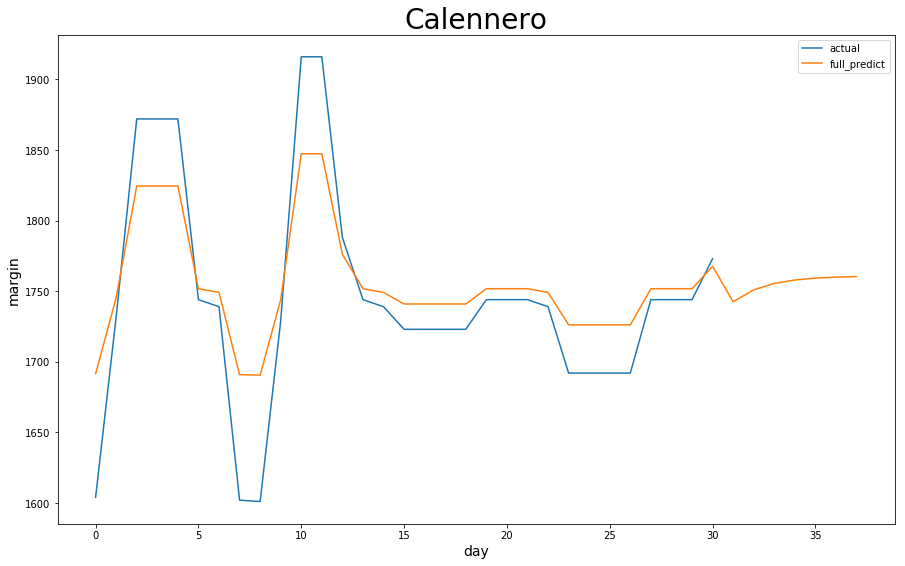

In [146]:
plt.figure(figsize=(15,9))
plt.plot(data, label="actual")
plt.plot(weekplus_pred, label ="full_predict")
plt.xlabel("day", fontsize=14)
plt.ylabel("margin", fontsize=14)
plt.legend()
plt.title("Calennero", fontsize=28)

Text(0.5,1,'Wolf 906')

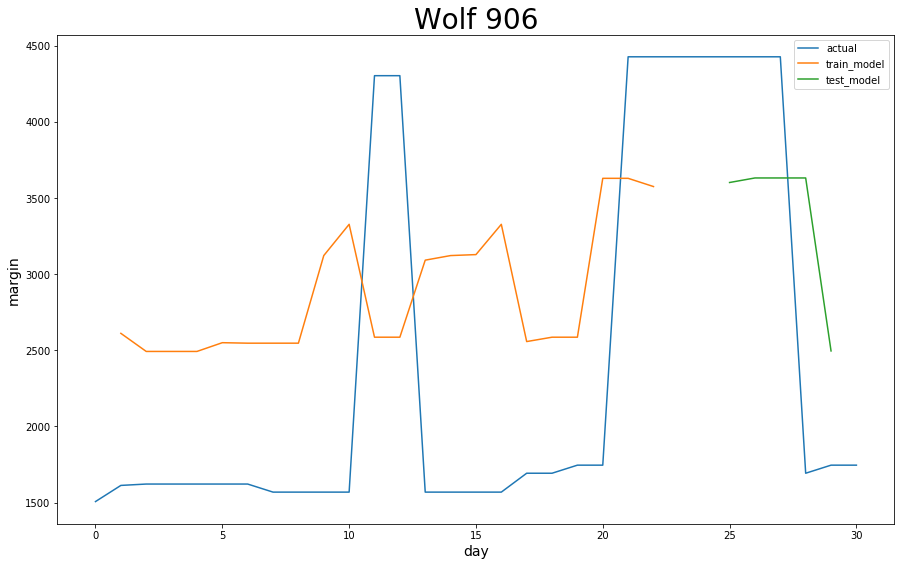

In [52]:
plt.figure(figsize=(15,9))
plt.plot(data, label="actual")
plt.plot(predict_plot_tr, label="train_model")
plt.plot(predict_plot_tt, label="test_model")
plt.xlabel("day", fontsize=14)
plt.ylabel("margin", fontsize=14)
plt.legend()
plt.title("Wolf 906", fontsize=28)

Text(0.5,1,'Wolf 906')

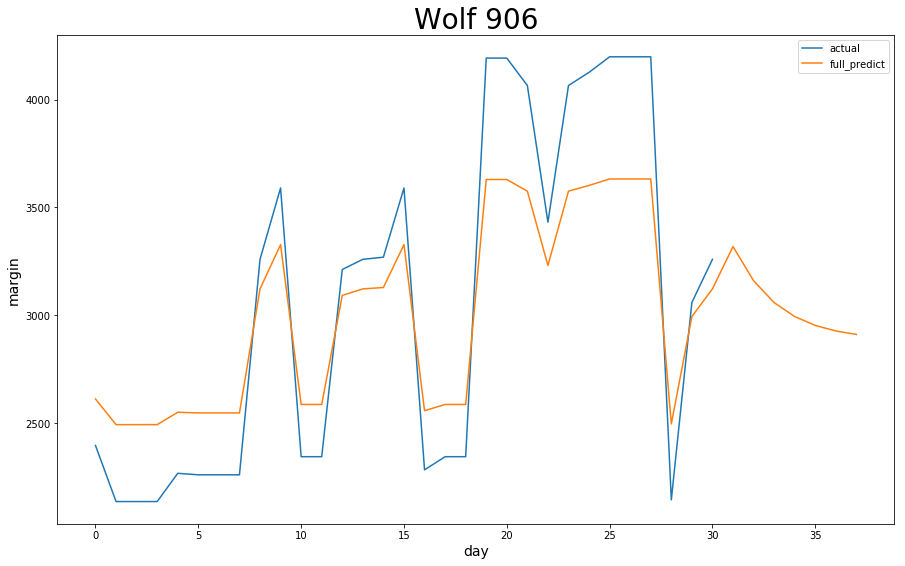

In [39]:
plt.figure(figsize=(15,9))
plt.plot(data, label="actual")
plt.plot(weekplus_pred, label ="full_predict")
plt.xlabel("day", fontsize=14)
plt.ylabel("margin", fontsize=14)
plt.legend()
plt.title("Wolf 906", fontsize=28)

In [408]:
weekplus_pred[-1]
#Eravate

2085.3962

In [437]:
weekplus_pred[-1]
#Epsilon Indi

928.663

In [465]:
weekplus_pred[-1]
#Calennero

1759.4556

In [491]:
weekplus_pred[-1]
#Wolf 906

2975.2742